In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import time
import pickle

In [6]:
class Pipeline:
    
    def __init__(self, batch_size = 100, epochs = 15, optimizer_lr = 0.0007):
        
        #dataset directory
        self.ROOT = pathlib.Path.cwd()/'PACKAGE'
        self.DATASET_DIR = self.ROOT/'DATASET'
        
        #data
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        
        self.train_dataset = None
        self.test_dataset = None
        
        #parameters
        self.class_mapper = class_mapper = {0:'T-shirt', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt',
               7:'Sneaker', 8:'Bag', 9:'Ankle boot'}
        
        self.input_shape = None
        
        #model
        self.model = None
        self.batch_size = batch_size 
        self.epochs = epochs 
        self.optimizer_lr = optimizer_lr
        
    def create_directory(self):
        start = time.time()
        template = [self.ROOT, self.DATASET_DIR]
        for directory in template:
            if directory.exists() == True:
                continue
            else:
                os.mkdir(directory)
        stop = time.time()
        total_time = stop - start
        print('Directory created, it took {0} s'.format(round(total_time, ndigits = 2)))
        del template
        
        

    def data_load_and_save(self):

        start = time.time()
        (self.X_train, self.y_train),(self.X_test, self.y_test) = tf.keras.datasets.fashion_mnist.load_data()
        stop = time.time()
        
        self.input_shape = tf.expand_dims(self.X_train[0], axis = 2).shape
        total_time = stop - start
        
        with open(self.DATASET_DIR/'X_train.pkl', 'wb') as file:
            pickle.dump(self.X_train, file)
        with open(self.DATASET_DIR/'X_test.pkl', 'wb') as file:
            pickle.dump(self.X_test, file)
        with open(self.DATASET_DIR/'y_train.pkl', 'wb') as file:
            pickle.dump(self.y_train, file)
        with open(self.DATASET_DIR/'y_test.pkl', 'wb') as file:
            pickle.dump(self.y_test, file)
            
        with open(self.DATASET_DIR/'class_mapper.pkl', 'wb') as file:
            pickle.dump(self.class_mapper, file)
        
        print('Data loaded and saved, it took {0} s'.format(round(total_time, ndigits = 2)))
    
    def data_preprocess(self):
        start = time.time()
        
        self.X_train = tf.expand_dims(self.X_train, axis = 3)
        self.X_test = tf.expand_dims(self.X_test, axis = 3)
        self.y_train = tf.keras.utils.to_categorical(self.y_train)
        self.y_test = tf.keras.utils.to_categorical(self.y_test)
        
        self.train_dataset = tf.data.Dataset.from_tensor_slices((self.X_train, self.y_train)).batch(self.batch_size)
        self.test_dataset = tf.data.Dataset.from_tensor_slices((self.X_test, self.y_test)).batch(self.batch_size)
        
        stop = time.time()
        total_time = stop - start
        
        print('Data prepared, it took {0} s'.format(round(total_time, ndigits = 2)))
        
    def show_data(self, to_show = 16):
        fig = plt.figure(figsize = (12,12))
        
        for i in range(1, to_show+1):
            random_number = np.random.randint(low = 0, high = len(self.X_train))
            ax = fig.add_subplot(to_show/4, 4, i)
            ax.imshow(self.X_train[random_number])
            ax.set_title(self.class_mapper[self.y_train[random_number].argmax()], 
                         color = 'white', fontsize = 14, fontweight = 'bold')
            ax.axis('off')  
        plt.subplots_adjust(hspace = 0.4, wspace = 0)
        plt.show()
        
    def model_build(self):
        
        self.model = tf.keras.Sequential()
        self.model.add(tf.keras.layers.Conv2D(filters = 16, kernel_size  =(2,2), padding = 'same',
                                              strides = 1, input_shape = self.input_shape))
        self.model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))
        self.model.add(tf.keras.layers.BatchNormalization())
        self.model.add(tf.keras.layers.Activation('relu'))
        
        self.model.add(tf.keras.layers.Conv2D(filters = 16, kernel_size  =(2,2), padding = 'same',
                                              strides = 1))
        self.model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))
        self.model.add(tf.keras.layers.BatchNormalization())
        self.model.add(tf.keras.layers.Activation('relu'))
                       
        self.model.add(tf.keras.layers.Flatten())
        
        self.model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
        self.model.add(tf.keras.layers.Dense(units = 10, activation = 'sigmoid'))
    
        self.model.summary()
    
    
    def train_model(self):
        print('''I'm starting training...''')
        start = time.time()
        self.model.compile(optimizer = tf.keras.optimizers.Adam(lr = self.optimizer_lr),
                          loss = 'categorical_crossentropy', metrics = ['accuracy'])
        self.model.fit(self.train_dataset, epochs = self.epochs)
        stop = time.time()
        total_time = stop - start
        print('Training took {0} second'.format(round(total_time, ndigits = 2)))
        
        print('''I'm saving model...''')
        tf.keras.models.save_model(self.model, self.ROOT/'MODEL', overwrite = True)
        
        print('Pipeline training is complete!')
        
    def train_pipeline(self):
        self.create_directory()
        self.data_load_and_save()
        self.data_preprocess()
        self.show_data()
        self.model_build()
        self.train_model()
        
        
        

Directory created, it took 0.0 s
Data loaded and saved, it took 1.37 s
Data prepared, it took 0.15 s


<ipython-input-6-c46ad4e76a10>:89: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(to_show/4, 4, i)


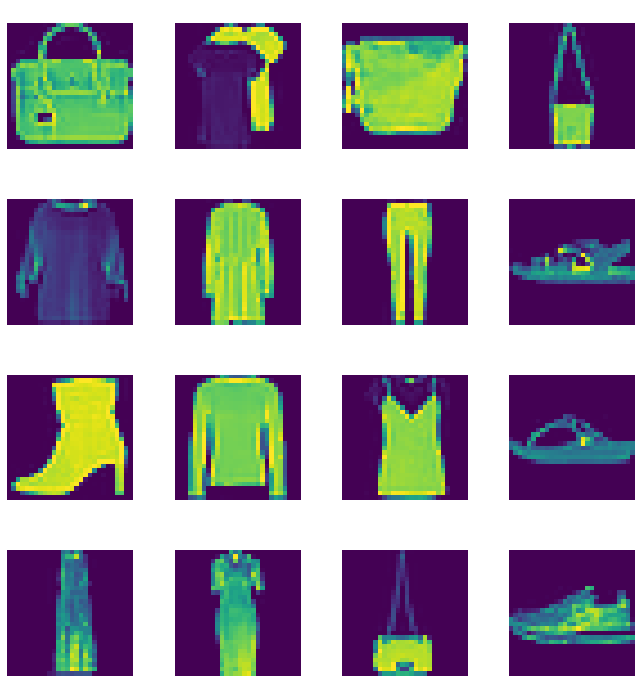

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 16)        80        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 16)        64        
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 16)        1040      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 7, 7, 16)         

In [7]:
obj1 = Pipeline().train_pipeline()